In [1]:
with open('news', 'r', encoding="utf-8") as f:
    text = f.read()
    #print(text)
    news = text.split("\n\n")
    count = {'sport': 0, 'world': 0, "us": 0, "business": 0, "health": 0, "entertainment": 0, "sci_tech": 0}
    for news_item in news:
        try:
            lines = news_item.split("\n")
            print(lines[6])
            file_to_write = open('data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
            count[lines[6]] = count[lines[6]] + 1
            file_to_write.write(news_item) 
            file_to_write.close()
        except:
            print("lines ",lines[0])

sport
business
sport
entertainment
us
entertainment
world
business
business
world
us
sport
entertainment
sport
world
health
world
world
us
entertainment
sport
us
us
sport
entertainment
world
business
sport
world
sci_tech
sport
entertainment
business
us
sport
world
world
sport
us
world
sci_tech
sport
health
entertainment
business
us
entertainment
entertainment
sport
sport
entertainment
us
entertainment
business
us
sport
sport
sport
entertainment
business
business
sport
entertainment
us
world
sport
sci_tech
sport
us
sport
business
sport
us
business
us
us
us
world
entertainment
business
world
business
sport
sport
sport
business
world
health
sport
sci_tech
world
entertainment
entertainment
sport
world
world
health
health
business
world
sport
sport
sport
sport
health
world
sport
sport
world
sport
world
world
health
world
world
sport
business
us
us
world
sport
health
business
sport
sport
world
world
us
sport
us
world
business
entertainment
us
entertainment
sci_tech
us
us
business
us
entertai

In [2]:
import pandas
import glob
                #0         1        2     3          4         5                6
category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]
directory_list = ["data/sport/*.txt", "data/world/*.txt","data/us/*.txt","data/business/*.txt","data/health/*.txt","data/entertainment/*.txt","data/sci_tech/*.txt",]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []


for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data' : t[0] + ' ' + t[1], 'flag' : category_list.index(t[6])})
    
training_data[0]

{'data': "court agrees to expedite n.f.l.'s appeal the decision means a ruling could be made nearly two months before the regular season begins, time for the sides to work out a deal without delaying the season.",
 'flag': 0}

In [3]:
training_data = pandas.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print(training_data.data.shape)

(32603,)


In [4]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

<h1>Multinomial Naive Bayes</h1>

In [6]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [7]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "I am play football"
#docs_new = "health"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])


sport


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

Confusion matrix, without normalization
[[2004   11   11    8    0    0    0]
 [  18 1481   16   57    0    2    2]
 [  94  157  810  132    0   10    4]
 [  68   48   35 1103    0   14   29]
 [  95   65   61  106  130    7    2]
 [ 230   41   29   28    0  499    6]
 [  91   72   48  308    5    7  207]]


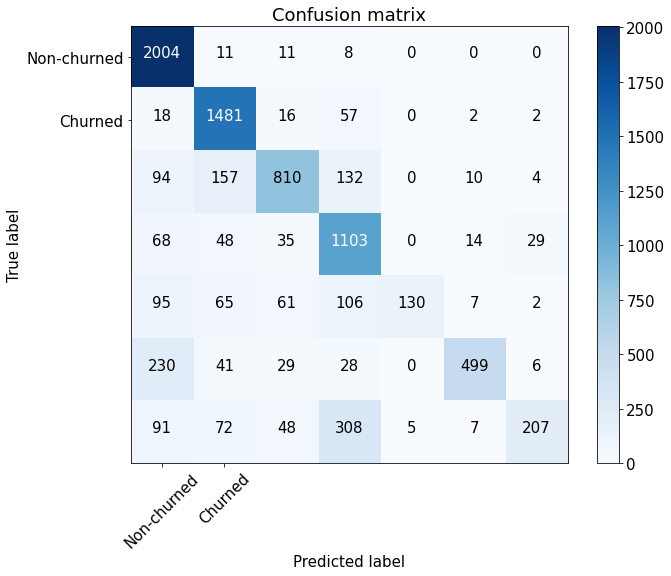

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, loaded_model.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [25]:
print('Model Accuracy:', clf.score(X_train, y_train))

Model Accuracy: 0.8355962702437428


In [26]:
predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

sport  -  entertainment
world  -  world
entertainment  -  entertainment
business  -  business
sport  -  sport
us  -  us
entertainment  -  business
business  -  business
sport  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
us  -  health
sci_tech  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sport  -  sci_tech
business  -  us
us  -  us
world  -  entertainment
sport  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
us  -  us
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
sport  -  sport
world  -  world
business  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
world  -  health
business  

In [27]:
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted)
print(confusion_mat)

[[2004   11   11    8    0    0    0]
 [  18 1481   16   57    0    2    2]
 [  94  157  810  132    0   10    4]
 [  68   48   35 1103    0   14   29]
 [  95   65   61  106  130    7    2]
 [ 230   41   29   28    0  499    6]
 [  91   72   48  308    5    7  207]]


<h1>Класс на основе многослойного персептрона: MLPClassifier-Neural Network Classifier</h1>

In [28]:
from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

clf_neural.fit(X_train, y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [29]:
pickle.dump(clf_neural, open("softmax.pkl", "wb"))

In [30]:
predicted = clf_neural.predict(X_test)
result_softmax = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])


entertainment  -  entertainment
business  -  world
entertainment  -  entertainment
business  -  business
us  -  sport
us  -  us
entertainment  -  business
business  -  business
entertainment  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
health  -  health
sci_tech  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sport  -  sci_tech
business  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
us  -  us
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
us  -  us
entertainment  -  entertainment
sport  -  

In [31]:
print('Model Accuracy:', clf_neural.score(X_train, y_train))

Model Accuracy: 0.9894896123016522


<h1>Метод опорных векторов</h1>

In [32]:
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf_svm.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [33]:
predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
business  -  business
sport  -  sport
us  -  us
business  -  business
business  -  business
entertainment  -  entertainment
sci_tech  -  sci_tech
sport  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
health  -  health
sci_tech  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
us  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
us  -  us
world  -  world
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
sport  -  sport
world  -  world
world  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
he

In [34]:
category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = '''The first step in interacting with a MySQL server is to establish a connection.
To do this, you need connect() from the mysql.connector module. This function takes in parameters like host, user, and password and returns a MySQLConnection 
object. You can receive these credentials as input from the user and pass them to connect():'''
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("softmax.pkl","rb")) #обучения с методом опорных векторов

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])
#результат вышел наука техника

sci_tech


In [35]:
# print('Model Accuracy:', clf_neural.score(X_train, y_train))

print('Model Accuracy:', clf_svm.score(X_train_tfidf, training_data.flag))

Model Accuracy: 0.9758917890991626


🤖 Метод k-ближайших соседей (k-nearest neighbour)

In [36]:
# from sklearn.neural_network import MLPClassifier

# clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

# clf_neural.fit(X_train, y_train)
from sklearn.neighbors import KNeighborsClassifier 

kNN = KNeighborsClassifier(n_neighbors=40)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [37]:
pickle.dump(kNN, open("kNN.pkl", "wb"))

In [38]:
predicted = kNN.predict(X_test)
result_knn = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_knn.to_csv('res_kNN.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
business  -  business
sport  -  sport
us  -  us
entertainment  -  business
business  -  business
entertainment  -  entertainment
sci_tech  -  sci_tech
world  -  sport
sport  -  sport
world  -  world
world  -  world
sci_tech  -  sci_tech
us  -  health
sci_tech  -  sci_tech
sport  -  sport
us  -  us
sport  -  sport
business  -  business
sport  -  sport
sport  -  sci_tech
business  -  us
us  -  us
world  -  entertainment
entertainment  -  entertainment
world  -  world
business  -  business
sport  -  sport
sport  -  sport
sci_tech  -  sci_tech
world  -  world
us  -  us
world  -  world
business  -  entertainment
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
sci_tech  -  sci_tech
sport  -  sport
world  -  world
business  -  business
entertainment  -  entertainment
sport  -  sport
world  -  world
business  -  world
us  -  us
entertainment  -  entertainment
sport  -  sport
health  

In [39]:
category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = '''Дыхания'''
docs_new = "sci_tech"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("kNN.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])

world


In [40]:
print('Model Accuracy:', kNN.score(X_train, y_train))

Model Accuracy: 0.82737608375593


Confusion matrix, without normalization
[[1904   13   34    9    4    8    4]
 [  18 1418   52   48    7   16    1]
 [  52  144  889   72   15   17   23]
 [  43   48   63 1064   14   20   71]
 [  24   34   49   50  280   14   11]
 [  83   35   42   27   11  628   13]
 [  28   52   59  134   11   24  471]]


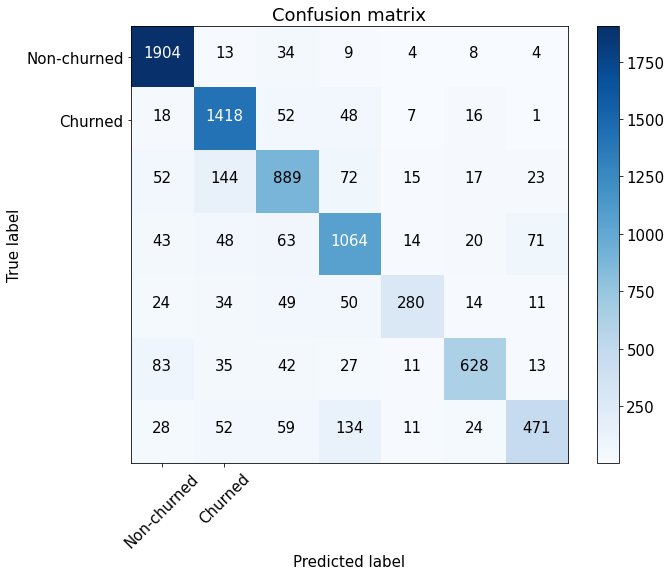

In [58]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, kNN.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

<h1 style="color: #ffff00">Decision Tree Classifier</h1>

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=50)
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
pickle.dump(classifier, open("dst.pkl", "wb"))

In [44]:
predicted = classifier.predict(X_test)
result_knn = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_knn.to_csv('res_dst.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

business  -  business
business  -  sport
world  -  world
sport  -  sport
business  -  business
world  -  world
us  -  us
us  -  us
sport  -  sport
health  -  health
business  -  business
entertainment  -  entertainment
world  -  world
sport  -  sci_tech
entertainment  -  sci_tech
world  -  world
sport  -  sport
us  -  entertainment
world  -  world
business  -  sci_tech
entertainment  -  entertainment
world  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  sport
world  -  us
us  -  us
business  -  us
sport  -  sport
us  -  us
business  -  entertainment
world  -  world
us  -  sci_tech
world  -  world
sport  -  us
sport  -  us
us  -  us
entertainment  -  business
sport  -  sci_tech
world  -  world
world  -  sci_tech
business  -  business
sport  -  us
world  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
sport  -  entertainment
sport  -  health
sport  -  sport
us  -  us
world  -  business
sport  -  sport
spo

In [45]:
category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = '''Дыхания'''
docs_new = "sport"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("dst.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])

sport


In [46]:
print('Model Accuracy:', classifier.score(X_train, y_train))

Model Accuracy: 0.990103059054474


<h1 style="color: #ffff00">Алгоритм классификации Random Forest</h1>

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=50)
clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
pickle.dump(clf, open("rfc.pkl", "wb"))

In [48]:
predicted = clf.predict(X_test)
result_knn = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_knn.to_csv('res_rfc.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

business  -  business
sport  -  sport
world  -  world
sport  -  sport
business  -  business
world  -  world
us  -  us
us  -  us
sport  -  sport
us  -  health
business  -  business
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
sci_tech  -  sci_tech
world  -  world
sport  -  sport
sport  -  entertainment
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  sport
us  -  us
us  -  us
us  -  us
sport  -  sport
us  -  us
sport  -  entertainment
world  -  world
us  -  sci_tech
world  -  world
us  -  us
world  -  us
us  -  us
health  -  business
us  -  sci_tech
world  -  world
sci_tech  -  sci_tech
business  -  business
business  -  us
us  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
sport  -  health
sport  -  sport
us  -  us
business  -  business
sport  -  sport
sport  -  sport
worl

In [49]:
print('Model Accuracy:', clf.score(X_train, y_train))

Model Accuracy: 0.990103059054474


<h1 style="color: #ffff00">Быстрый градиентный бустинг <i>CatBoost</i></h1>

In [1]:
!pip3 install catboost

  Using cached catboost-1.0.3-cp310-none-win_amd64.whl (77.3 MB)


In [68]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=50)
cat.fit(X_train, y_train, verbose=False)
# y_pred = clf.predict(X_test)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [69]:
pickle.dump(cat, open("catb.pkl", "wb"))

In [71]:
cat.plot_tree(tree_idx=0)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [70]:
predicted = cat.predict(X_test)
result_knn = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_knn.to_csv('res_catb.csv', sep = ',')
# print(y_test)

for predicted_item, result in zip(predicted, y_test):
    try:
        print(category_list[predicted_item], ' - ', category_list[result])
    except:
        print('category_list[predicted_item] =>', category_list[predicted_item])
        

TypeError: list indices must be integers or slices, not numpy.float64

<h1 style="color: #ffff00">Алгоритм XGBoost</h1>

In [50]:
# import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=50)
xg.fit(X_train, y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
pickle.dump(xg, open("xg.pkl", "wb"))

In [52]:
predicted = xg.predict(X_test)
result_knn = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_knn.to_csv('res_xg.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

business  -  business
entertainment  -  sport
world  -  world
sport  -  sport
business  -  business
world  -  world
us  -  us
us  -  us
sport  -  sport
health  -  health
business  -  business
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
sci_tech  -  sci_tech
world  -  world
sport  -  sport
sport  -  entertainment
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  sport
us  -  us
us  -  us
us  -  us
sport  -  sport
us  -  us
entertainment  -  entertainment
world  -  world
us  -  sci_tech
world  -  world
us  -  us
us  -  us
us  -  us
sci_tech  -  business
us  -  sci_tech
world  -  world
sci_tech  -  sci_tech
business  -  business
sci_tech  -  us
us  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
sport  -  health
sport  -  sport
us  -  us
business  -  business
sport  -  sport
s

In [53]:
print('Model Accuracy:', xg.score(X_train, y_train))

Model Accuracy: 0.9283494192704074


<h1 style="color: #ffff00">Логистическая регрессия (Logistic Regression)

In [54]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=50)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pickle.dump(classifier, open("clf.pkl", "wb"))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
predicted = clf.predict(X_test)
result_knn = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_knn.to_csv('res_clf.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

business  -  business
sport  -  sport
world  -  world
sport  -  sport
business  -  business
world  -  world
us  -  us
us  -  us
sport  -  sport
health  -  health
business  -  business
entertainment  -  entertainment
world  -  world
sci_tech  -  sci_tech
us  -  sci_tech
world  -  world
sport  -  sport
sport  -  entertainment
world  -  world
sci_tech  -  sci_tech
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
entertainment  -  entertainment
sport  -  sport
us  -  us
us  -  us
us  -  us
sport  -  sport
us  -  us
entertainment  -  entertainment
world  -  world
us  -  sci_tech
world  -  world
us  -  us
us  -  us
us  -  us
sci_tech  -  business
us  -  sci_tech
world  -  world
sci_tech  -  sci_tech
business  -  business
sci_tech  -  us
us  -  us
us  -  us
entertainment  -  entertainment
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
business  -  health
sport  -  sport
us  -  us
business  -  business
sport  -  sport
sport  -  sp

In [56]:
category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = '''Дыхания'''
docs_new = "document"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("xg.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])

business


In [57]:
print('Model Accuracy:', clf.score(X_train, y_train))

Model Accuracy: 0.927940454768526
